In [2]:
import pandas as pd
import os

import numpy as np

from utils_tables import *

import seaborn as sns


In [3]:
from pathlib import Path

In [2]:

current_directory=os.getcwd()
tables_directory=os.path.join(os.path.dirname(current_directory),"Results")
table_name="Results_rondrit016.csv"

table_path=os.path.join(tables_directory,table_name)



## Plotting

In [10]:
tables_list=[table for table in os.listdir(tables_directory) if "Fittest" in table]

for table in tables_list:
    #open table
    finetune_table=pd.read_csv(os.path.join(tables_directory,table))
    #Cleaning

    
    #Create and concatenate Dataset Col
    #Getting dataset name    
    name, _ = os.path.splitext(table) 
    name_head="Results_"
    dataset_name=name.split(name_head)[1]

    test_set=pd.Series([dataset_name for i in range(len(finetune_table))],name="Dataset")
    finetune_table=pd.concat([test_set, finetune_table],axis=1)

    #append
    tables_dict[table]=finetune_table
    #clear
    del finetune_table, test_set


In [11]:
full_table=stack_datasets_tables(tables_dict)
    


,Dataset,Unnamed: 0,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1,Av_Best_unit,Eff_1_unit,M
0,rondrit016_Fittest,0,50,0.0,0.5,0.00,0.283645,0.298512,0.023058,0.714759,0.936913,0.825836
1,rondrit016_Fittest,1,50,0.0,0.5,0.05,0.289056,0.295614,0.023213,0.823138,0.945339,0.884238
2,rondrit016_Fittest,2,50,0.0,0.5,0.10,0.288439,0.298512,0.023252,0.810786,0.947448,0.879117
3,rondrit016_Fittest,3,50,0.0,0.5,0.20,0.274875,0.296109,0.023114,0.539112,0.939963,0.739537
4,rondrit016_Fittest,4,50,0.0,0.7,0.00,0.266364,0.290800,0.023031,0.368633,0.935437,0.652035


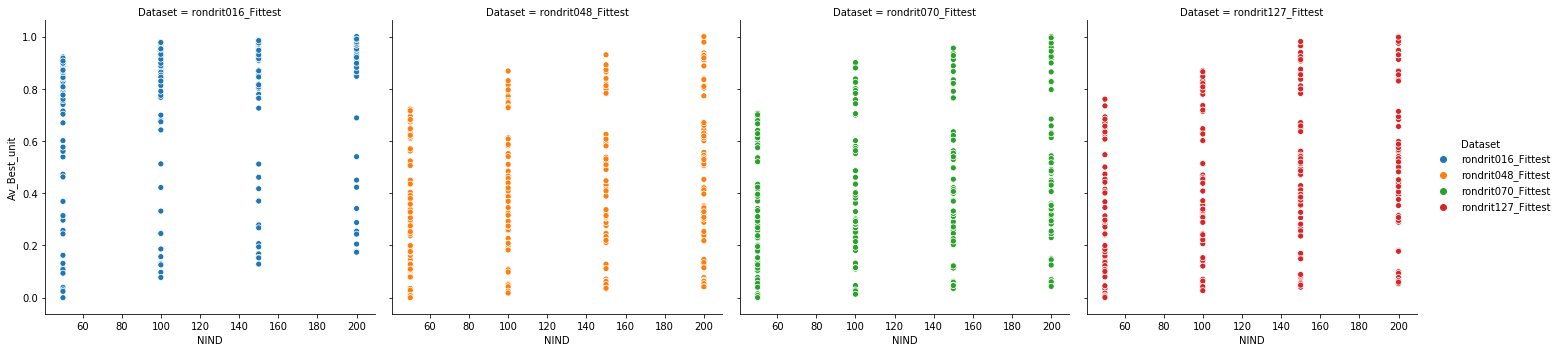

In [14]:
sns.relplot(x="NIND", y="Av_Best_unit", hue="Dataset",
            col="Dataset", data=full_table);


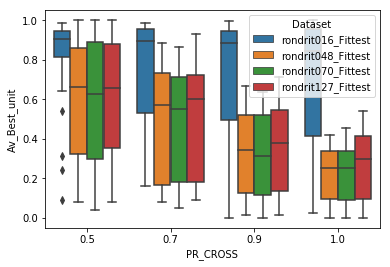

In [16]:
ax = sns.boxplot(x="PR_CROSS", y="Av_Best_unit",hue="Dataset", data=full_table)

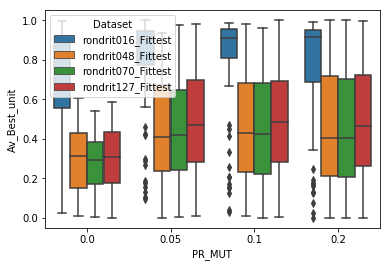

In [17]:
ax = sns.boxplot(x="PR_MUT", y="Av_Best_unit",hue="Dataset", data=full_table)

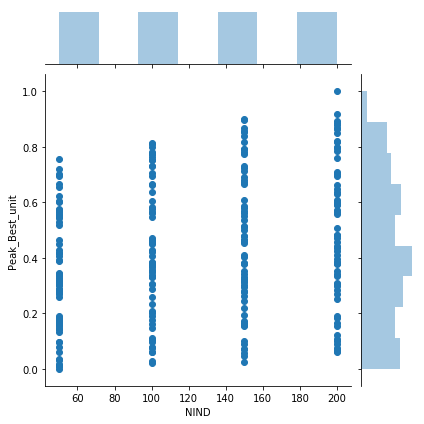

In [8]:
# 2D KDE plot
sns.jointplot(x=norm_table["NIND"], y=norm_table["Peak_Best_unit"])

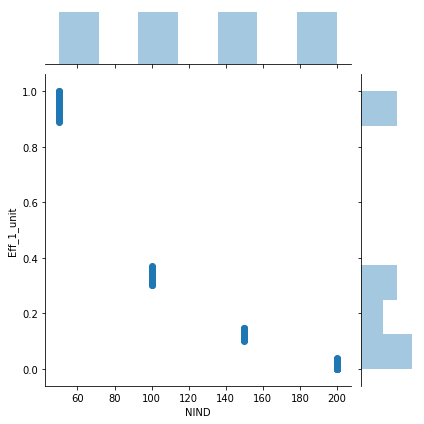

In [45]:
# 2D KDE plot
sns.jointplot(x=norm_table["NIND"], y=norm_table["Eff_1_unit"])

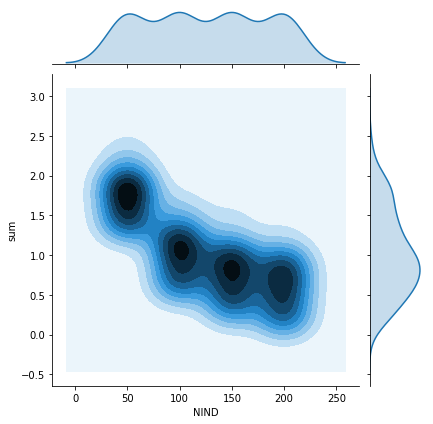

In [9]:
sns.jointplot(x="NIND", y="sum",kind="kde",data=res_table)

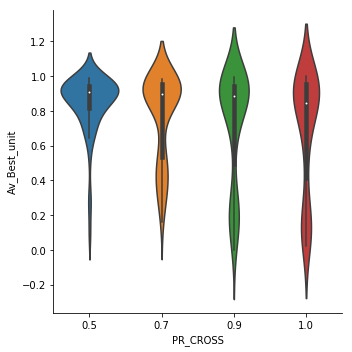

In [8]:
sns.catplot(x="PR_CROSS",y="Av_Best_unit",kind='violin',data=res_table)